In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def show_original(img):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)

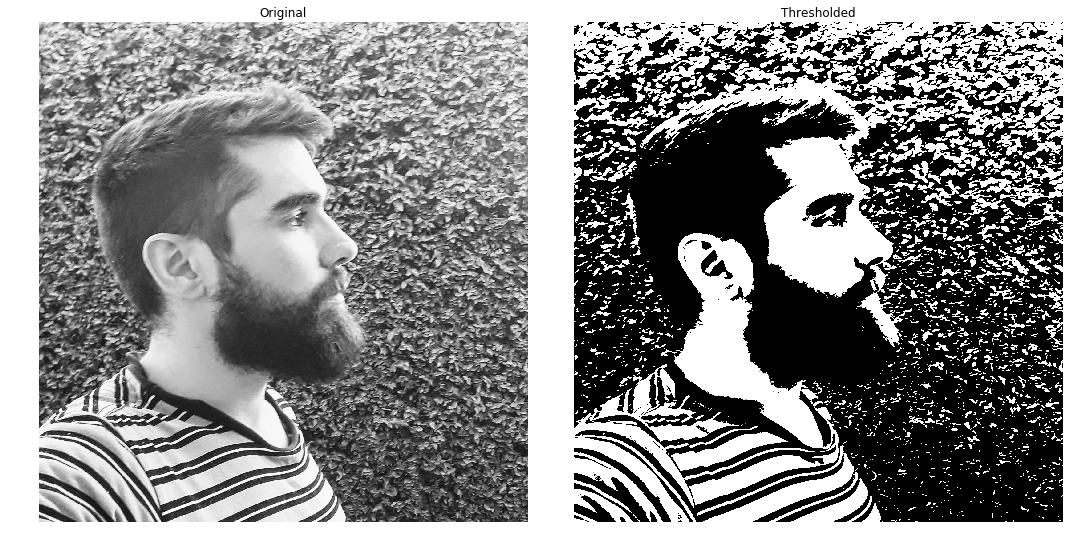

In [4]:
img_path = r'C:\Users\fabio\Documents\foto2.jpg'

img = cv2.imread(img_path)

show_original(img)

threshold = 160
img[img>threshold]=255
img[img<threshold]=0.0

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.tight_layout()
plt.title("Thresholded")
plt.axis('off')
plt.show()

In [5]:
img = cv2.imread(r'C:\Users\fabio\Documents\foto1.jpg')

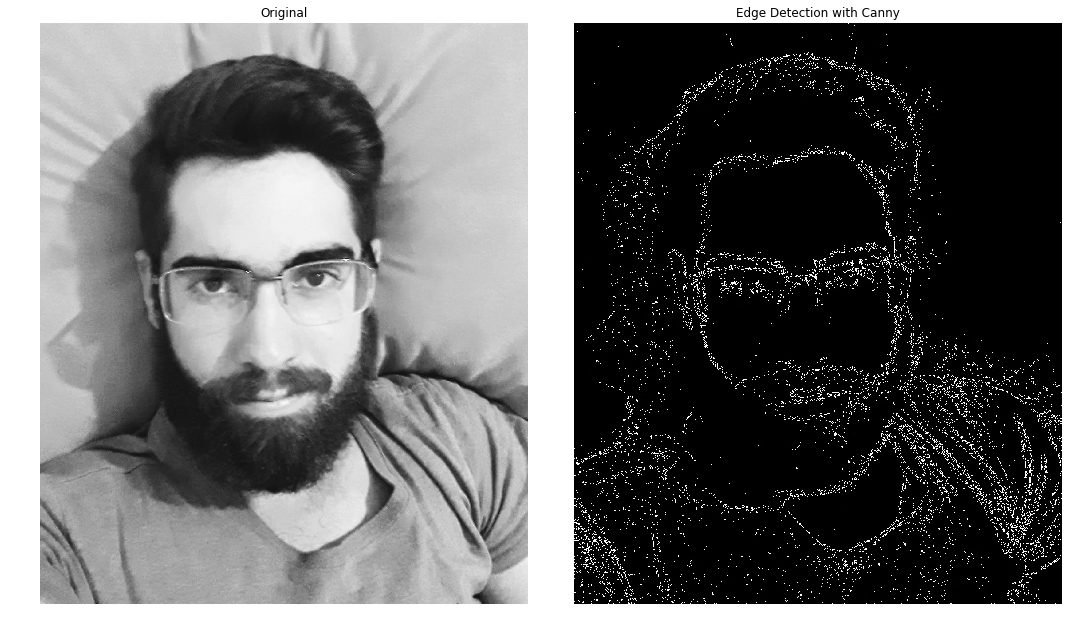

In [6]:
show_original(img)

plt.subplot(1, 2, 2)
cv2.imwrite(r'C:\Users\fabio\Documents\img.jpg', cv2.Canny(img, 65, 60))
n_img = cv2.imread(r'C:\Users\fabio\Documents\img.jpg', 0)
plt.imshow(cv2.cvtColor(n_img, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.title('Edge Detection with Canny')
plt.axis('off')
plt.show()

In [7]:
ship_img = cv2.imread(r'C:\Users\fabio\Pictures\Saved Pictures\ships.jpg', 0)

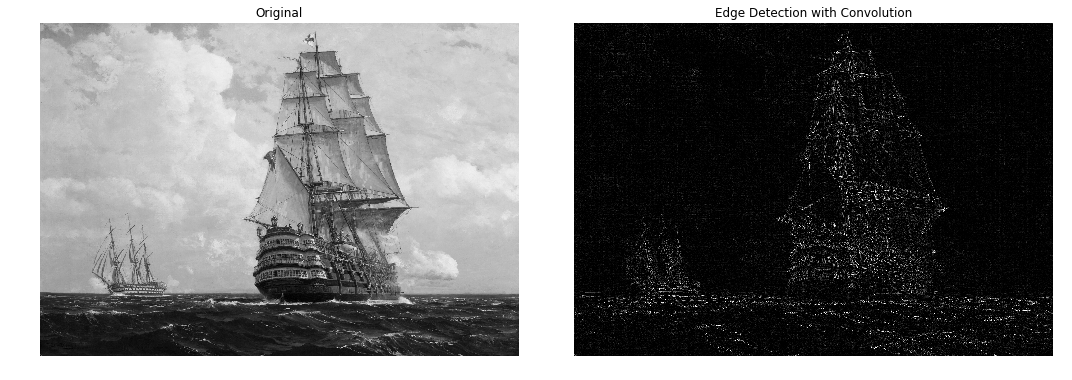

In [8]:
show_original(ship_img)

edge_kernel = np.array([[-1, -1, -1],
                        [-1,  8, -1],
                        [-1, -1, -1]])

conv = cv2.filter2D(ship_img, -1, edge_kernel)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(conv, cv2.COLOR_BGR2RGB))
plt.title('Edge Detection with Convolution')
plt.tight_layout()
plt.axis('off')
plt.show()

In [9]:
img_path = r'C:\Users\fabio\Pictures\beethoven1.jpg'
beet_image = cv2.imread(img_path)

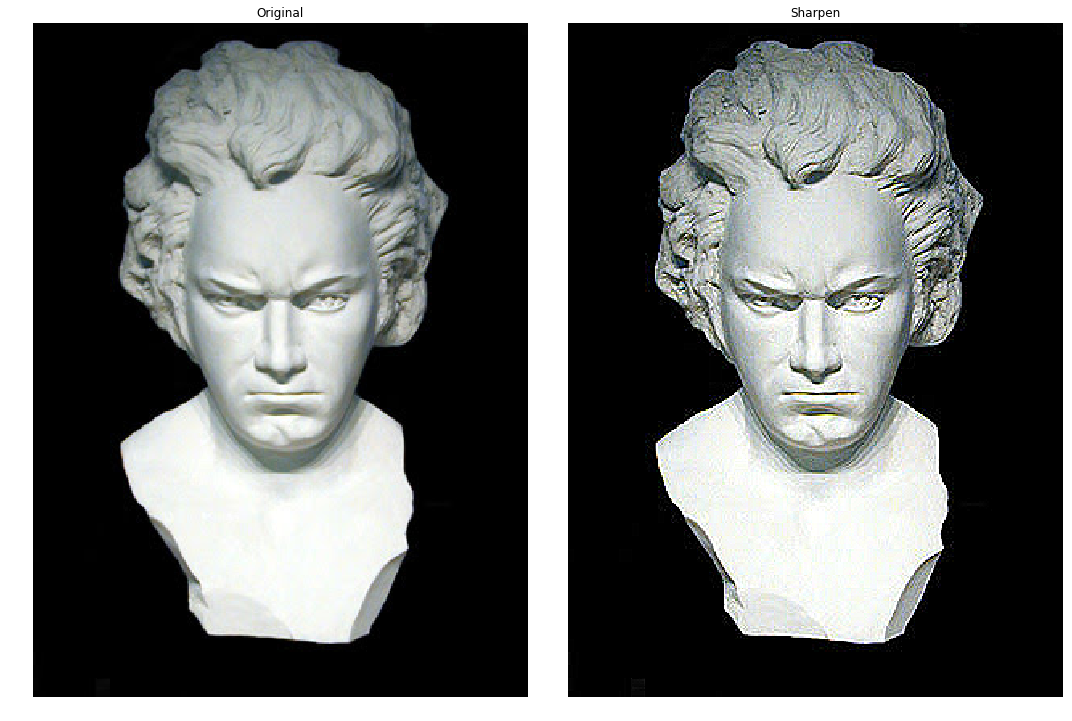

In [10]:
show_original(beet_image)

sharp_kernel = np.array([[0, -1, 0],
                         [-1, 5,-1],
                         [0, -1, 0]])

plt.subplot(1, 2, 2)
conv = cv2.filter2D(beet_image, -1, sharp_kernel)
plt.imshow(cv2.cvtColor(conv, cv2.COLOR_BGR2RGB))
plt.tight_layout()
plt.title('Sharpen')
plt.axis('off')
plt.show()

In [11]:
img_path = r'C:\Users\fabio\Pictures\little_girl.jpg'
girl_image = cv2.imread(img_path)

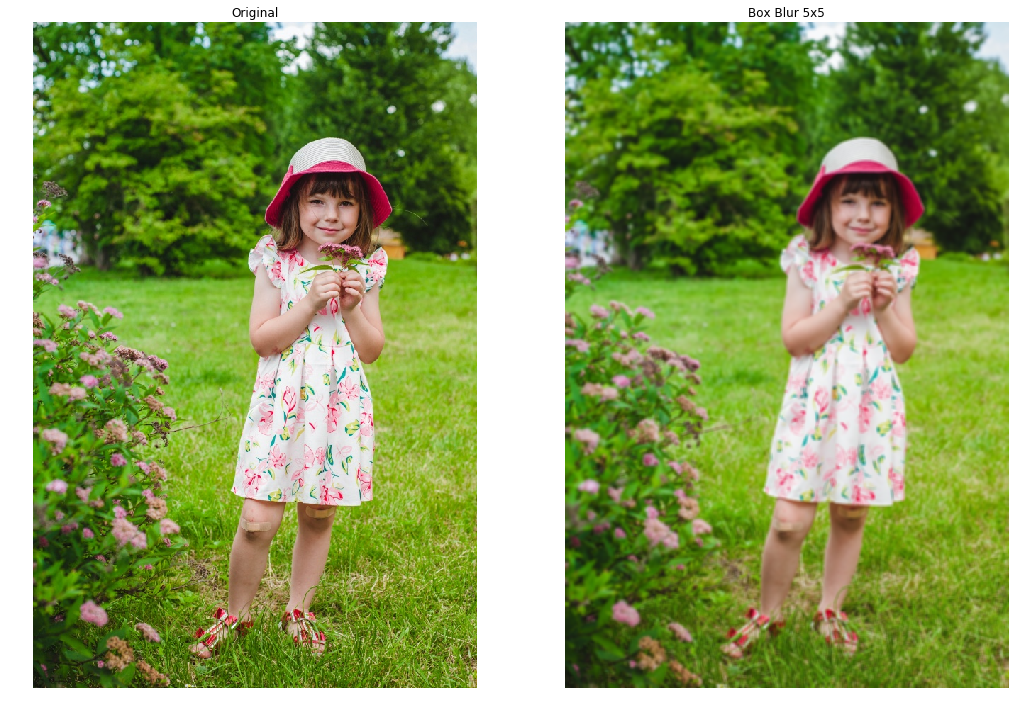

In [12]:
show_original(girl_image)

kernel = np.ones((5, 5), np.float32) / 25

plt.subplot(1, 2, 2)
dst = cv2.filter2D(girl_image, -1, kernel)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Box Blur 5x5')
plt.tight_layout()
plt.axis('off')
plt.show()

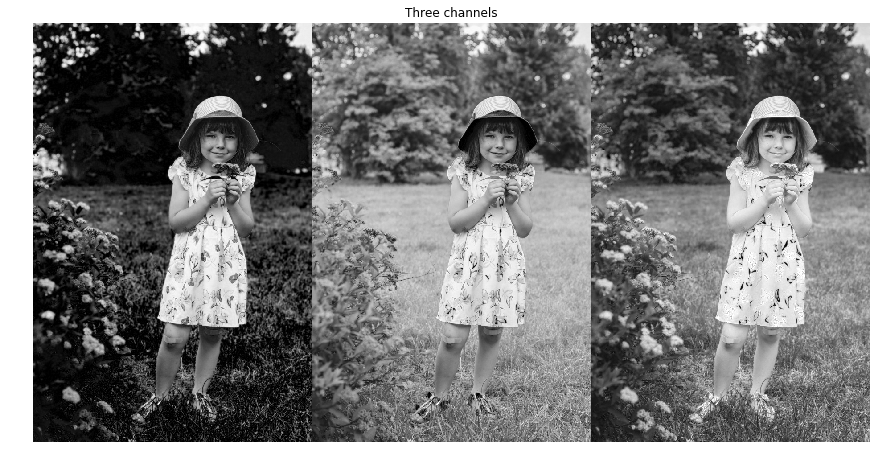

In [13]:
concat_img = np.concatenate((girl_image[:, :, 0], girl_image[:, :, 1], girl_image[:, :, 2]), axis=1)
plt.imshow(cv2.cvtColor(concat_img, cv2.COLOR_GRAY2RGB))
plt.axis('off')
plt.title('Three channels')
plt.show()

In [14]:
from scipy.ndimage import gaussian_filter
gaussian_filter1 = gaussian_filter(girl_image, sigma=1)
gaussian_filter2 = gaussian_filter(girl_image, sigma=2)
gaussian_filter3 = gaussian_filter(girl_image, sigma=4)

Text(0.5,1,'Gaussian Filter')

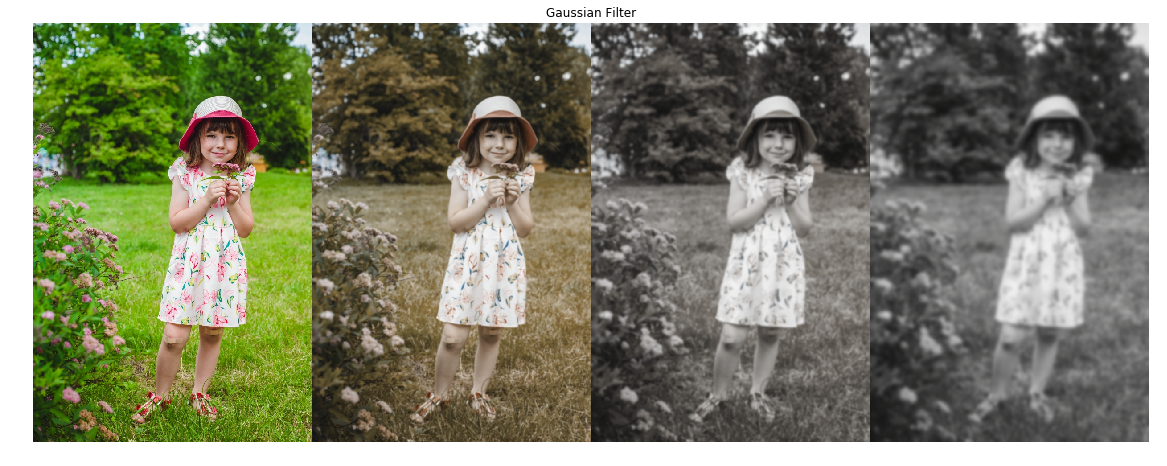

In [15]:
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(np.concatenate((girl_image, gaussian_filter1, gaussian_filter2, gaussian_filter3), axis=1), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Gaussian Filter')

In [16]:
img_path = r'C:\Users\fabio\Downloads\Telegram Desktop\img.png'
image = cv2.imread(img_path)

In [17]:
image1 = cv2.filter2D(image, -1, sharp_kernel)
image2 = cv2.filter2D(image, -1, edge_kernel)
image3 = cv2.cvtColor(image, cv2.THRESH_TOZERO) 

In [18]:
gaussian_filter1 = gaussian_filter(image, sigma=1)
gaussian_filter2 = gaussian_filter(image, sigma=2)
gaussian_filter3 = gaussian_filter(image, sigma=4)

In [19]:
concat1 = np.concatenate((gaussian_filter1, gaussian_filter2, gaussian_filter3), axis=1)
concat2 = np.concatenate((image1, image2, image3), axis=1)
concat3 = np.concatenate((concat1, concat2), axis=0)

(-0.5, 1919.5, 1279.5, -0.5)

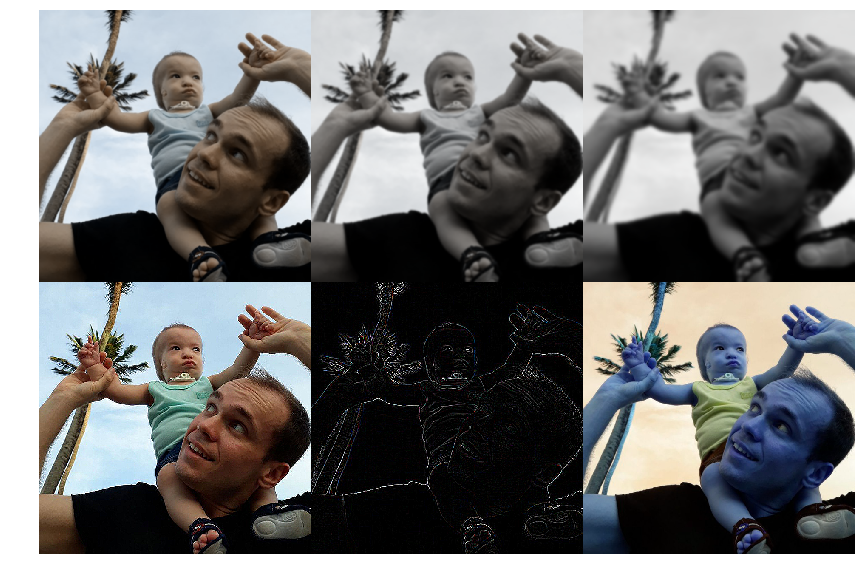

In [20]:
plt.imshow(cv2.cvtColor(concat3, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [21]:
def body_detection(img, name):
    body_cascade = cv2.CascadeClassifier(r'C:\Users\fabio\Documents\FaceDetection\cascades\haarcascade_fullbody.xml')
    body = body_cascade.detectMultiScale(img, 1.3, 5, minSize=(100, 100))
    for (x, y, w, h) in body:
        dst = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0 , 255), 3)
    cv2.imwrite(r'C:\Users\fabio\Documents\FaceDetection\{}.jpg'.format(name), dst)

In [22]:
def face_detection(img, name):
    face_cascade = cv2.CascadeClassifier(r'C:\Users\fabio\Documents\FaceDetection\cascades\haarcascade_frontalface_default.xml')
    face = face_cascade.detectMultiScale(img, scaleFactor=1.5, minSize=(100, 100))
    for (x, y, w, h) in face:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.imwrite(r'C:\Users\fabio\Documents\FaceDetection\{}.jpg'.format(name), img)  

In [23]:
face_detection(girl_image, 'Girl')
face_detection(beet_image, 'Foto1')

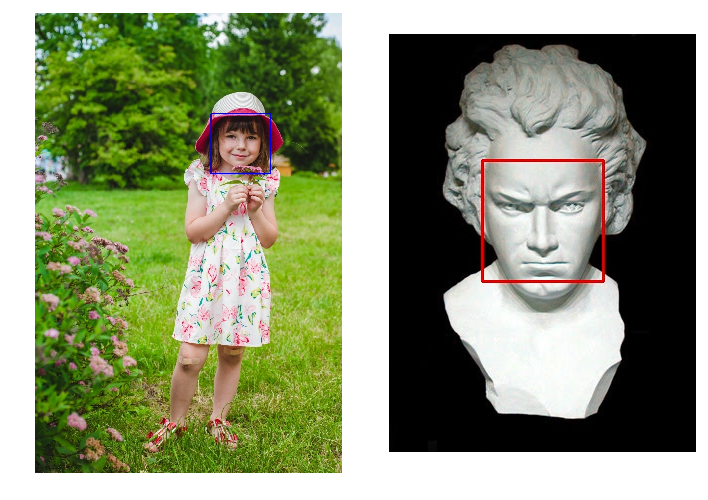

<Figure size 720x576 with 0 Axes>

In [24]:
sns.set(rc={'figure.figsize': (10, 8)})
face = cv2.imread(r'C:\Users\fabio\Documents\FaceDetection\Girl.jpg')
face2 = cv2.imread(r'C:\Users\fabio\Documents\FaceDetection\Foto1.jpg')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(face2)
plt.axis('off')
plt.tight_layout()
plt.figure(figsize=(10, 8))
plt.show()

In [25]:
img_path = r'C:\Users\fabio\Documents\FaceDetection\img2.jpg'
img = cv2.imread(img_path)

In [26]:
body_detection(img, 'detected')
img_dt = cv2.imread(r'C:\Users\fabio\Documents\FaceDetection\detected.jpg')

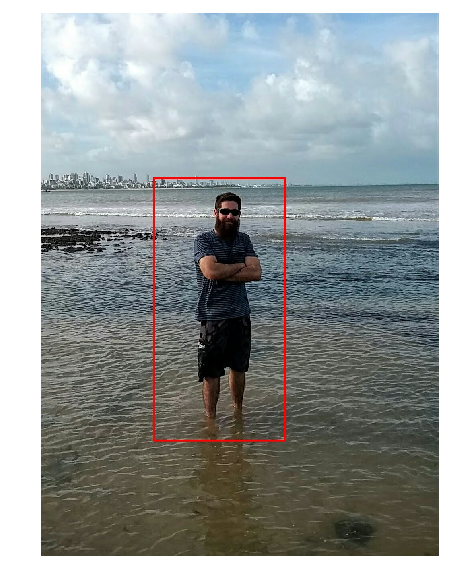

In [27]:
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_dt, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()